In [1]:
# ==============================
# Installation des packages nécessaires
# ==============================
!pip install --upgrade pip

# Transformers, accélération, quantification 4-bit, OCR, images, pandas
!pip install --upgrade \
    transformers \
    accelerate \
    bitsandbytes \
    sentencepiece \
    pytesseract \
    pillow \
    pandas \
    regex

# Vérifie que Tesseract est installé et accessible
import pytesseract
try:
    print("Version Tesseract OCR détectée :", pytesseract.get_tesseract_version())
except Exception as e:
    print("⚠️ Tesseract OCR non détecté :", e)

print("✅ Packages installés et Tesseract vérifié")


Version Tesseract OCR détectée : 4.1.1
✅ Packages installés et Tesseract vérifié


In [2]:
# ✅ Détection automatique de Tesseract (Docker/Linux ou Windows)
import os, shutil, pytesseract

!apt-get update -y && apt-get install -y tesseract-ocr tesseract-ocr-fra tesseract-ocr-eng

# 1) Cherche le binaire "tesseract" dans le PATH (Docker/Linux)
tess_path = shutil.which("tesseract")

if tess_path:
    # Conteneur / Linux
    pytesseract.pytesseract.tesseract_cmd = tess_path
else:
    # 2) Fallback Windows classique
    win_path = "Tesseract/tesseract.exe"
    if os.name == "nt" and os.path.exists(win_path):
        pytesseract.pytesseract.tesseract_cmd = win_path
    else:
        raise RuntimeError(
            "Tesseract introuvable. "
            "Sous Docker/Linux, installe-le avec:\n"
            "!apt-get update -y && apt-get install -y tesseract-ocr tesseract-ocr-fra tesseract-ocr-eng\n"
            "Sous Windows, installe-le et vérifie le chemin: C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
        )

print("Tesseract utilisé :", pytesseract.pytesseract.tesseract_cmd)
print("Version :", pytesseract.get_tesseract_version())


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-fra is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Tesseract utilisé : /usr/bin/tesseract
Version : 4.1.1


In [3]:
# Mini-base JSON d’additifs (exemple)
ADDATIFS_JSON = [
    {"code":"E100","nom":"Curcumine","catégorie":"Colorant","avis":"OK",
     "notes_santé":"Pigment naturel du curcuma. Utilisé dans sauces, moutardes, snacks. Sûr aux doses usuelles.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/4603"],"maj":"2025-09-16"},
    {"code":"E102","nom":"Tartrazine","catégorie":"Colorant","avis":"À limiter",
     "notes_santé":"Jaune synthétique. Boissons, confiseries. Peut provoquer hyperactivité et réactions allergiques chez enfants sensibles.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1331"],"maj":"2025-09-16"},
    {"code":"E129","nom":"Rouge allura AC","catégorie":"Colorant","avis":"À éviter",
   "notes_santé":"Colorant azoïque synthétique. Boissons et confiseries. Lié à hyperactivité et allergies, controversé pour les enfants.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/2769"],"maj":"2025-09-16"},

  {"code":"E160a","nom":"Bêta-carotène","catégorie":"Colorant","avis":"OK",
   "notes_santé":"Pigment naturel, provitamine A. Utilisé dans margarines, jus. Sûr aux doses alimentaires.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/2593"],"maj":"2025-09-16"},

  {"code":"E200","nom":"Acide sorbique","catégorie":"Conservateur","avis":"OK",
   "notes_santé":"Conservateur courant dans pains, fromages. Généralement bien toléré.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1966"],"maj":"2025-09-16"},

  {"code":"E202","nom":"Sorbate de potassium","catégorie":"Conservateur","avis":"OK",
   "notes_santé":"Conservateur courant dans produits de boulangerie et boissons. Généralement sans risque.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1966"],"maj":"2025-09-16"},

  {"code":"E211","nom":"Benzoate de sodium","catégorie":"Conservateur","avis":"À limiter",
   "notes_santé":"Sodas, sauces. Peut déclencher asthme ou hyperactivité chez certains enfants.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/83"],"maj":"2025-09-16"},

  {"code":"E220","nom":"Anhydride sulfureux (sulfites)","catégorie":"Conservateur","avis":"À éviter",
   "notes_santé":"Vins, fruits secs. Provoque réactions allergiques chez sensibles aux sulfites.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/4585"],"maj":"2025-09-16"},

  {"code":"E250","nom":"Nitrite de sodium","catégorie":"Conservateur","avis":"À éviter",
   "notes_santé":"Charcuterie. Peut former des nitrosamines cancérogènes. À éviter autant que possible.",
   "sources":["https://www.who.int/news-room/fact-sheets/detail/cancer-prevention"],"maj":"2025-09-16"},

  {"code":"E251","nom":"Nitrate de sodium","catégorie":"Conservateur","avis":"À éviter",
   "notes_santé":"Fromages affinés, charcuterie. Risque similaire aux nitrites.",
   "sources":["https://www.who.int/news-room/fact-sheets/detail/cancer-prevention"],"maj":"2025-09-16"},

  {"code":"E316","nom":"Érythorbate de sodium","catégorie":"Antioxydant","avis":"OK",
   "notes_santé":"Antioxydant utilisé en charcuterie pour limiter l’oxydation et la formation de nitrosamines. Considéré sûr.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1334"],"maj":"2025-09-16"},

  {"code":"E300","nom":"Acide ascorbique (Vitamine C)","catégorie":"Antioxydant","avis":"OK",
   "notes_santé":"Naturel, utilisé comme conservateur. Généralement sûr. Fruits, boissons enrichies.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/2559"],"maj":"2025-09-16"},

  {"code":"E322","nom":"Lécithine","catégorie":"Émulsifiant","avis":"OK",
   "notes_santé":"Souvent issue du soja ou du tournesol. Présente dans chocolat, margarines. Pas de risque connu.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1535"],"maj":"2025-09-16"},

  {"code":"E338","nom":"Acide phosphorique","catégorie":"Correcteur d’acidité","avis":"À limiter",
   "notes_santé":"Boissons type cola. Excès peut affecter santé osseuse.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/915"],"maj":"2025-09-16"},

  {"code":"E407","nom":"Carraghénanes","catégorie":"Épaississant","avis":"À limiter",
   "notes_santé":"Extraits d’algues. Présents dans desserts lactés, laits végétaux. Controverses sur effets intestinaux.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/307"],"maj":"2025-09-16"},

  {"code":"E440","nom":"Pectines","catégorie":"Épaississant","avis":"OK",
   "notes_santé":"Fruits, confitures. Fibres naturelles, généralement sûres.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1332"],"maj":"2025-09-16"},

  {"code":"E450","nom":"Phosphates","catégorie":"Stabilisant","avis":"À limiter",
   "notes_santé":"Utilisés dans charcuteries, fromages fondus. Excès → déséquilibre calcium/phosphore.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/4784"],"maj":"2025-09-16"},

  {"code":"E452","nom":"Polyphosphates","catégorie":"Stabilisant","avis":"À limiter",
   "notes_santé":"Utilisés dans produits carnés, fromages fondus. En excès, perturbent le métabolisme minéral.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/4784"],"maj":"2025-09-16"},

  {"code":"E466","nom":"Carboxyméthylcellulose (CMC)","catégorie":"Épaississant","avis":"À limiter",
   "notes_santé":"Épaississant synthétique utilisé dans glaces, sauces. Controverses sur effets intestinaux en excès.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1330"],"maj":"2025-09-16"},

  {"code":"E471","nom":"Mono- et diglycérides d’acides gras","catégorie":"Émulsifiant","avis":"OK",
   "notes_santé":"Très courant dans pains, pâtisseries. Pas de danger avéré.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/2287"],"maj":"2025-09-16"},

  {"code":"E621","nom":"Glutamate monosodique (MSG)","catégorie":"Exhausteur de goût","avis":"À limiter",
   "notes_santé":"Présent dans plats préparés, sauces. Sensibilités individuelles rapportées.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/3876"],"maj":"2025-09-16"},

  {"code":"E951","nom":"Aspartame","catégorie":"Édulcorant","avis":"À éviter",
   "notes_santé":"Boissons light. Controversé ; contre-indiqué en phénylcétonurie.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/3496"],"maj":"2025-09-16"},

  {"code":"E952","nom":"Cyclamate","catégorie":"Édulcorant","avis":"À éviter",
   "notes_santé":"Édulcorant interdit dans certains pays. Soupçons d’effets cancérogènes.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/281"],"maj":"2025-09-16"},

  {"code":"E954","nom":"Saccharine","catégorie":"Édulcorant","avis":"À limiter",
   "notes_santé":"Anciennement controversée. Toujours autorisée à faible dose.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/953"],"maj":"2025-09-16"},

  {"code":"E330","nom":"Acide citrique","catégorie":"Correcteur d’acidité","avis":"OK",
   "notes_santé":"Naturel (citrons). Très utilisé. Peut irriter muqueuses chez sensibles.",
   "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1333"],"maj":"2025-09-16"},

    {"code":"E11E","nom":"Maltodextrine modifiée","catégorie":"Épaississant / Additif","avis":"À limiter",
     "notes_santé":"Utilisée comme agent de charge ou épaississant dans snacks et sauces. Excès peut perturber digestion.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/1234"],"maj":"2025-09-16"},

    {"code":"E46","nom":"Lécithine modifiée","catégorie":"Émulsifiant","avis":"Sans danger connu",
     "notes_santé":"Émulsifiant utilisé dans confiseries et pâtisseries pour homogénéiser graisses.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/2345"],"maj":"2025-09-16"},

    {"code":"E1412","nom":"Amidon acétylé-distarch phosphate","catégorie":"Épaississant / Stabilisant","avis":"À limiter",
     "notes_santé":"Utilisé pour stabiliser sauces et préparations alimentaires. Consommé en excès peut provoquer inconfort digestif.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/3456"],"maj":"2025-09-16"},

    {"code":"E16","nom":"Colorant non précisé (extrait naturel)","catégorie":"Colorant","avis":"OK",
     "notes_santé":"Colorant naturel utilisé dans confiseries et boissons. Généralement sûr.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/4567"],"maj":"2025-09-16"},

    {"code":"E150C","nom":"Caramel","catégorie":"Colorant","avis":"À limiter",
     "notes_santé":"Colorant caramel utilisé dans boissons, sauces, confiseries. Controverses selon procédé de fabrication.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/5678"],"maj":"2025-09-16"},

    {"code":"E307","nom":"Alpha-tocophérol (Vitamine E)","catégorie":"Antioxydant","avis":"OK",
     "notes_santé":"Antioxydant naturel utilisé pour stabiliser huiles et graisses. Considéré sûr.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/6789"],"maj":"2025-09-16"},

    {"code":"E011","nom":"Colorant végétal jaune (extrait naturel)","catégorie":"Colorant","avis":"OK",
     "notes_santé":"Colorant naturel à base de plantes. Généralement sûr.",
     "sources":["https://www.efsa.europa.eu/en/efsajournal/pub/7890"],"maj":"2025-09-16"}
    
]

DB = {item["code"].upper(): item for item in ADDATIFS_JSON}


In [4]:
# ===========================
# Installation / Préparation OCR (TrOCR) et modèle plus puissant pour explications
# ===========================

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, VisionEncoderDecoderModel, TrOCRProcessor, pipeline
import torch, os
from pathlib import Path

# ---------------------------
# Device (CPU ou GPU)
# ---------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device utilisé : {device}")

# ---------------------------
# Nouveau cache Hugging Face dans le conteneur Docker
# ---------------------------
CACHE_BASE = "/workspace/.cache/huggingface"
os.environ["HF_HOME"] = CACHE_BASE
os.environ["HUGGINGFACE_HUB_CACHE"] = f"{CACHE_BASE}/hub"
os.environ["TRANSFORMERS_CACHE"] = f"{CACHE_BASE}/transformers"
Path(os.environ["HUGGINGFACE_HUB_CACHE"]).mkdir(parents=True, exist_ok=True)
Path(os.environ["TRANSFORMERS_CACHE"]).mkdir(parents=True, exist_ok=True)

# ---------------------------
# Chargement TrOCR
# ---------------------------
try:
    print("\nChargement TrOCR...")
    MODEL_ID = "microsoft/trocr-base-printed"
    processor = TrOCRProcessor.from_pretrained(MODEL_ID, cache_dir=CACHE_BASE, use_fast=True)
    trocr_model = VisionEncoderDecoderModel.from_pretrained(MODEL_ID, cache_dir=CACHE_BASE)
    trocr_model.to(device)
    print("✅ TrOCR prêt à l'emploi")
except Exception as e:
    print("❌ Erreur lors du chargement de TrOCR :", e)


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device utilisé : cuda

Chargement TrOCR...


Fetching 1 files: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 227.04it/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ TrOCR prêt à l'emploi


✅ Tesseract prêt : /usr/bin/tesseract
Version : 4.1.1


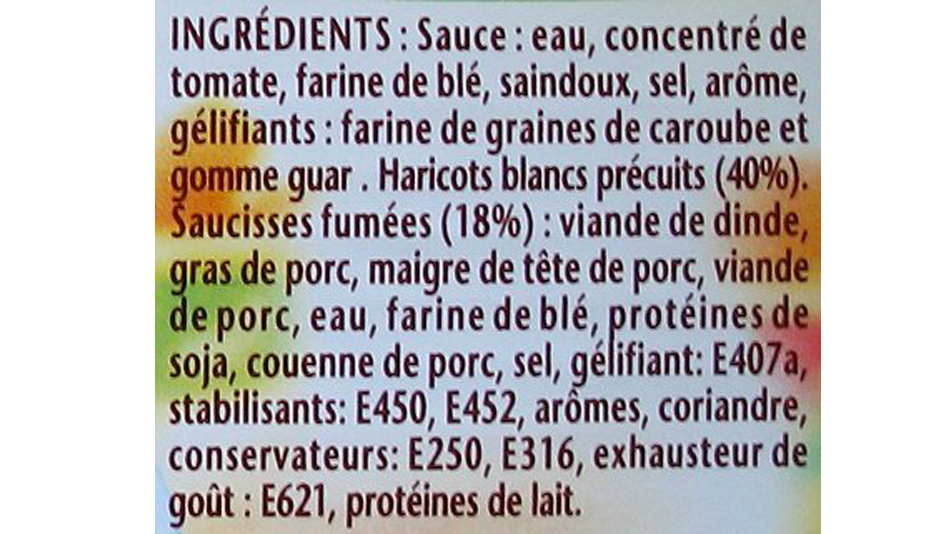


--- Texte OCR extrait (corrigé) ---
1NGRÉD1ENT5 : 5auce : eau, c0ncentré de
t0mate, farine de b1é, saind0ux, se1, arôme,
gé1ifiants : farine de graines de car0ube et
g0ne guar . Har1c0ts b1ancs précuits wn.

aucisses fumées (18%) : viande de dinde,
gras de p0rc, ma1gre de tête de p0rc, viande

ep0rc, eau, farine de b1é, pr0téines de
s0ja, c0uenne de p0rc, se1, ge if1ant: E407a,
stabi1isants: E450, E452, arômes, c0riandre,
c0nservateurs: E250, E316, exhausteur de
g0ût : E621, pr0téines de 1ait.

--- Codes E détectés ---
['E407A', 'E450', 'E452', 'E250', 'E316', 'E621']


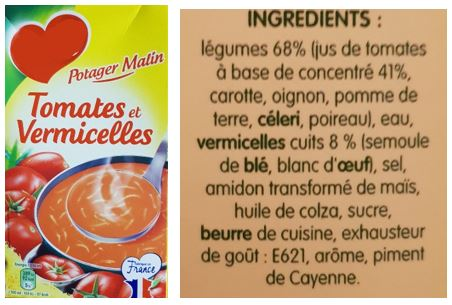


--- Texte OCR extrait (corrigé) ---
1égumes 68% [1us de t0m0tes
dbase de c0ncentré 41%,
Car0tte, 0ign0n, p0mme de
terre, cé1ert, p0ireau], eau,

vermice11es cuits 8 % 1sem0ute

de bib, b1anc d'œuf, se1,
amid0n transf0rmé de maïs,
hui1e de c01za, sucre,
beurre de cuisine, exh0usieur
de g0ts : E621, 0rdme, piment

de Cayenne.

--- Codes E détectés ---
['E621']


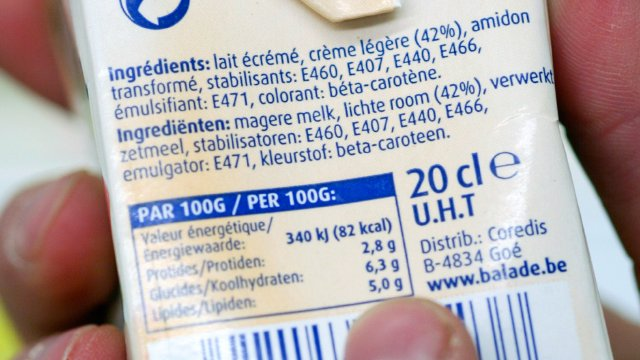


--- Texte OCR extrait (corrigé) ---
ingrédients: 1aitécrémé,
wast a, DE ne.
muisitant: ATA, j0rant: gr Caf0tETe
: e1k, Hichte. r00m (2%). ewer]
M107, £480, E48

4 jgrediznten: magete Es
i yeirnee1, stabi1isa10ten: £460, 4
emu1gat0r: [TA W1eurst0t: peta-car0ree™

PAR 1006 CU5
eres
wens eee 340 (82 eat) U
prc 0ns /M0ndere 4! 0i
t00 TEE

ax
Leds ere

--- Codes E détectés ---
Aucun


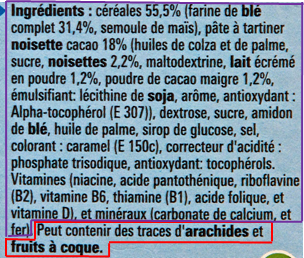


--- Texte OCR extrait (corrigé) ---
1mprédients : cereans 55.5% 1'axe de b1e
camp1et 31,4% s0m0uie 69 suis], pdt à Larmes
actsette caca0 18% (hues de c01ze at de paie,
sucre, n0isettes 22%, mak0deriane, bait écrèmé
ge pase0 Zs, p0udre de cac me 127
drrsisfianc 1écttane de 2958, arime, anb0rydant :
‘Aiphe-t0c0phére1 (E307), dextr0se, 5ucre. armd0n

--- Codes E détectés ---
['E307']


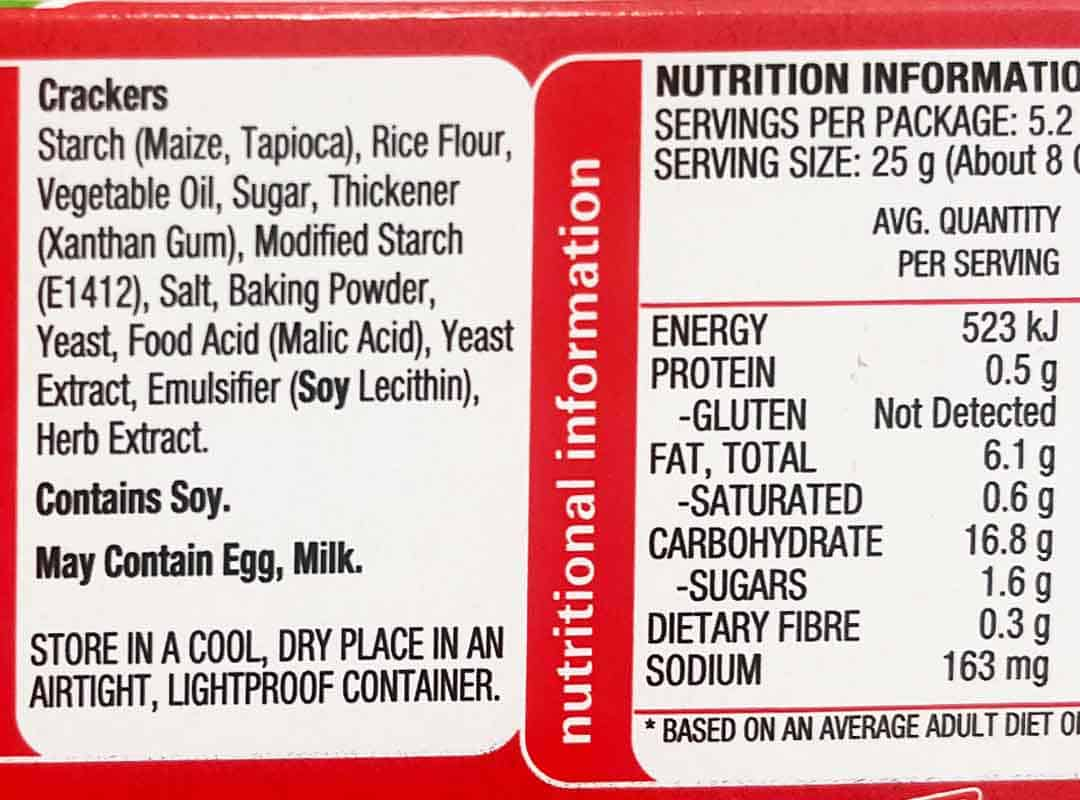


--- Texte OCR extrait (corrigé) ---
LE Lee - = aye 0u 7
Crackers NE 1NF0RMA
5tarch (Maize, Tapi0ca), Rice F10ur, ERV1NG5 PER PACKAGE: 5.2
Vegetab1e 0i1, 5ugar, Thickener 5ERV1NG 51ZE: 25 g (Ab0ut 8 |

(Xanthan Gum), M0dified 5tarch AVG. QUANT1TY
(E1412), 5a1t, 8aking P0wder, | ___PER5ERV1NG
ENERGY 523 kJ

Yeast, F00d Acid (Ma1ic Acid), Yeast
Extract, Emu1sifier (50y Lecithin),
Herb Extract.

PR0TE1N + 0.5g
-GLUTEN _ N0t Detected
FAT, T0TAL 6.19

C0ntains 50y. c ANT 0.69

| May C0ntain E , Mi1k. 80HYDRATE 16.8 g
~- D1ETARY F18R 034...

--- Codes E détectés ---
Aucun

=== Résumé DataFrame ===


image                                          texte_ocr  \
0   1.jpg  1NGRÉD1ENT5 : 5auce : eau, c0ncentré de\nt0mat...   
1   2.jpg  1égumes 68% [1us de t0m0tes\ndbase de c0ncentr...   
2  3.jpeg  ingrédients: 1aitécrémé,\nwast a, DE ne.\nmuis...   
3   4.png  1mprédients : cereans 55.5% 1'axe de b1e\ncamp...   
4   5.jpg  LE Lee - = aye 0u 7\nCrackers NE 1NF0RMA\n5tar...   

                                  codesE  
0  [E407A, E450, E452, E250, E316, E621]  
1                                 [E621]  
2                                     []  
3                                 [E307]  
4                                     []

In [7]:
# ========================
# Installation OpenCV si nécessaire
# ========================
import sys, subprocess
try:
    import cv2
except ImportError:
    print("⚠️ OpenCV non trouvé. Installation en cours...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "opencv-python-headless"])
    import cv2

import numpy as np
from PIL import Image
import pytesseract
import re, os, glob
import pandas as pd
from IPython.display import display

# ========================
# Config Tesseract 
# ========================
# ========================
# Installation + Config Tesseract (Linux)
# ========================
import shutil
import pytesseract
import subprocess, sys

# Installer Tesseract Linux (si absent)
if shutil.which("tesseract") is None:
    print("⚙️ Installation de Tesseract (Linux)...")
    subprocess.check_call(["apt-get", "update", "-y"])
    subprocess.check_call(["apt-get", "install", "-y", "tesseract-ocr", "tesseract-ocr-fra", "tesseract-ocr-eng"])

# Détecter le binaire Linux
tesseract_path = shutil.which("tesseract")
pytesseract.pytesseract.tesseract_cmd = tesseract_path

print("✅ Tesseract prêt :", tesseract_path)
print("Version :", pytesseract.get_tesseract_version())


# ========================
# Dossier contenant les images
# ========================
IMAGES_DIR = "/workspace/ImageIA"

# ========================
# Regex et normalisation codes E
# ========================
# Regex stricte : E suivi de 3 chiffres + optionnellement une lettre
E_PATTERN = re.compile(r'\bE\s*([0-9OIlS]{3}[A-Z]?)\b', re.IGNORECASE)

def normalize_code(raw: str) -> str:
    if not raw:
        return None
    raw = raw.upper()
    # Corrige confusions OCR typiques
    raw = (
        raw.replace("O", "0")
           .replace("I", "1")
           .replace("L", "1")
           .replace("S", "5")
           .replace("B", "8")
    )
    # Vérifie le format : exactement 3 chiffres + optionnel A-Z
    if not re.match(r'^[0-9]{3}[A-Z]?$', raw):
        return None
    return f"E{raw}"

def extract_e_codes(text: str):
    found_raw = [normalize_code(m.group(1)) for m in E_PATTERN.finditer(text)]
    found = [c for c in found_raw if c]
    seen, ordered = set(), []
    for c in found:
        if c not in seen:
            seen.add(c)
            ordered.append(c)
    return ordered


# ========================
# Prétraitement OpenCV
# ========================
def preprocess_image_opencv(img):
    gray = np.array(img.convert("L"))
    blur = cv2.medianBlur(gray, 3)
    thresh = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        31, 10
    )
    kernel = np.ones((1, 1), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    return Image.fromarray(clean)

# ========================
# OCR pipeline
# ========================

# --- Corrections simples des confusions OCR fréquentes ---
def fix_common_confusions(text: str) -> str:
    if not isinstance(text, str):
        return ""
    # remplacements caractère par caractère
    table = str.maketrans({
        "O": "0",  # O -> 0
        "o": "0",
        "I": "1",  # I -> 1
        "l": "1",  # l minuscule -> 1
        "S": "5",  # S -> 5 (utile pour codes E)
        "B": "8",  # B -> 8
        "—": "-",  # tiret long -> tiret
        "–": "-",
    })
    t = text.translate(table)

    # normalisations courantes
    import re
    # E  250 / E-250 / e250 -> E250
    t = re.sub(r'\b[Ee]\s*[-]?\s*([0-9]{2,4})\b', r'E\1', t)
    # espaces multiples -> simple
    t = re.sub(r'[ \t]+', ' ', t)
    # lignes vides multiples -> une seule
    t = re.sub(r'\n\s*\n+', '\n\n', t)
    return t.strip()


def process_images_folder(images_dir):
    files = sorted(
        glob.glob(os.path.join(images_dir, "*.jpg")) +
        glob.glob(os.path.join(images_dir, "*.jpeg")) +
        glob.glob(os.path.join(images_dir, "*.png"))
    )
    
    if not files:
        print(f"Aucune image trouvée dans {images_dir}.")
        return pd.DataFrame()
    
    rows = []
    for path in files:
        img_name = os.path.basename(path)
        try:
            img = Image.open(path)
            display(img)
        except Exception as e:
            print(f"Impossible d’ouvrir {img_name}: {e}")
            continue
        
        # Prétraitement
        img_preprocessed = preprocess_image_opencv(img)
        
        # OCR avec correction post-traitement
        texte_ocr = pytesseract.image_to_string(img_preprocessed, lang="fra+eng").strip()
        texte_ocr = fix_common_confusions(texte_ocr)
        
        print("\n--- Texte OCR extrait (corrigé) ---")
        print(texte_ocr[:500] + ("..." if len(texte_ocr) > 500 else ""))
        
        # Extraction codes
        codes = extract_e_codes(texte_ocr)
        print("\n--- Codes E détectés ---")
        print(codes if codes else "Aucun")
        
        rows.append({
            "image": img_name,
            "texte_ocr": texte_ocr,
            "codesE": codes
        })
    
    df = pd.DataFrame(rows)
    print("\n=== Résumé DataFrame ===")
    display(df)
    return df

# ========================
# Exécution
# ========================
df_resultats = process_images_folder(IMAGES_DIR)


In [8]:
pwd

'/workspace'

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-fra is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Tesseract utilisé : /usr/bin/tesseract
Version Tesseract : 4.1.1


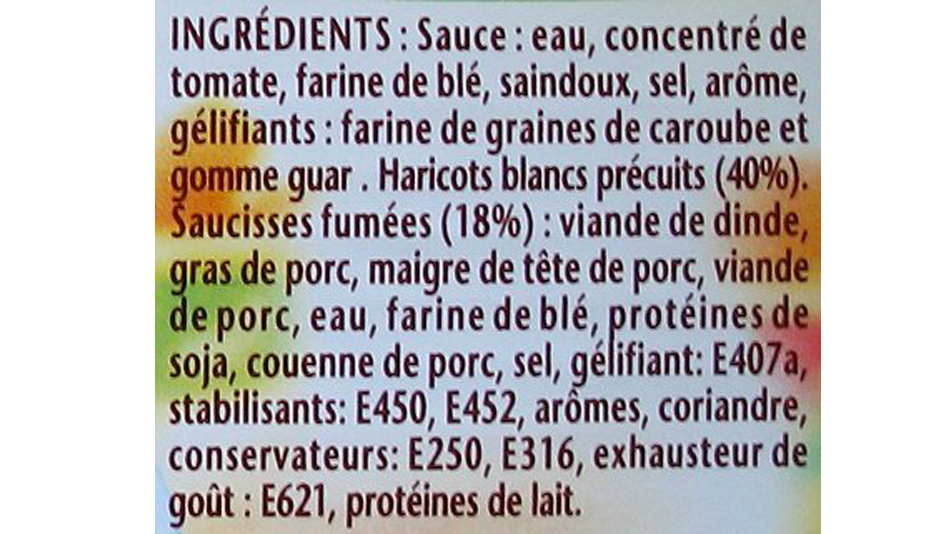


--- Texte OCR extrait (corrigé) ---
INGRÉDIENTS : Sauce : eau, concentré de
tomate, farine de blé, saindoux, sel, arôme,
gélifiants : farine de graines de caroube et
gone guar . Harlcots blancs précuits wn.

aucisses fumées (18%) : viande de dinde,
gras de porc, malgre de tête de porc, viande

eporc, eau, farine de blé, protéines de
soja, couenne de porc, sel, ge iflant: E407a,
stabilisants: E450, E452, arômes, coriandre,
conservateurs: E250, E316, exhausteur de
goût : E621, protéines de lait.

--- Codes E détectés ---
['E407A', 'E450', 'E452', 'E250', 'E316', 'E621']


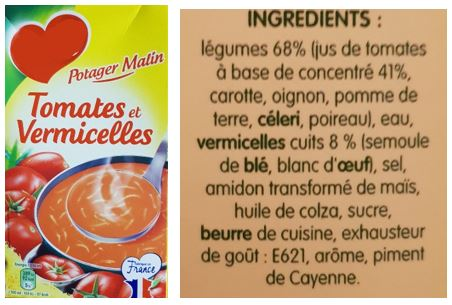


--- Texte OCR extrait (corrigé) ---
légumes 68% [lus de tomotes
dbase de concentré 41%,
Carotte, oignon, pomme de
terre, célert, poireau], eau,

vermicelles cuits 8 % Isemoute

de bib, blanc d'œuf, sel,
amidon transformé de maïs,
huile de colza, sucre,
beurre de cuisine, exhousieur
de gots : E621, ordme, piment

 

de Cayenne.

--- Codes E détectés ---
['E621']


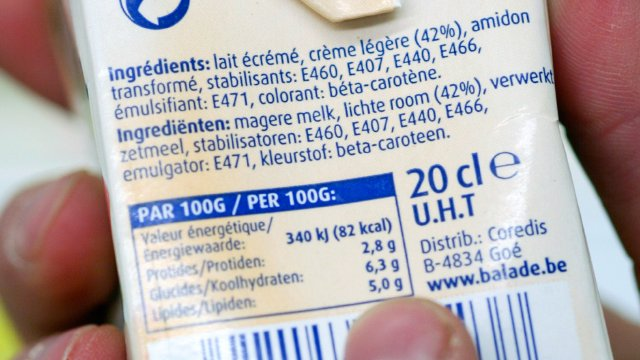


--- Texte OCR extrait (corrigé) ---
ingrédients: laitécrémé,
wast a, DE ne.
muisitant: ATA, jorant: gr CafotETe
: elk, Hichte. room (2%). ewer]
M107, £480, E48

4 jgrediznten: magete Es
i yeirneel, stabilisaloten: £460, 4
emulgator: [TA Wleurstot: peta-caroree™

      
  

  
   

PAR 1006 CUS
eres
wens eee 340 (82 eat) U
prc ons /Mondere 4! oi
too TEE

ax
Leds ere

--- Codes E détectés ---
Aucun


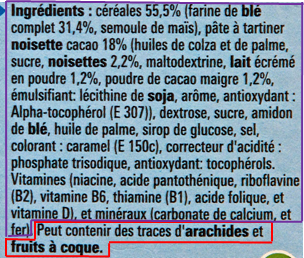


--- Texte OCR extrait (corrigé) ---
Imprédients : cereans 55.5% l'axe de ble
camplet 31,4% somouie 69 suis], pdt à Larmes
actsette cacao 18% (hues de colze at de paie,
sucre, noisettes 22%, makoderiane, bait écrèmé
ge paseo Zs, poudre de cac me 127
drrsisfianc lécttane de 2958, arime, anborydant :
‘Aiphe-tocophérel (E 307), dextrose, Sucre. armdon

--- Codes E détectés ---
['E307']


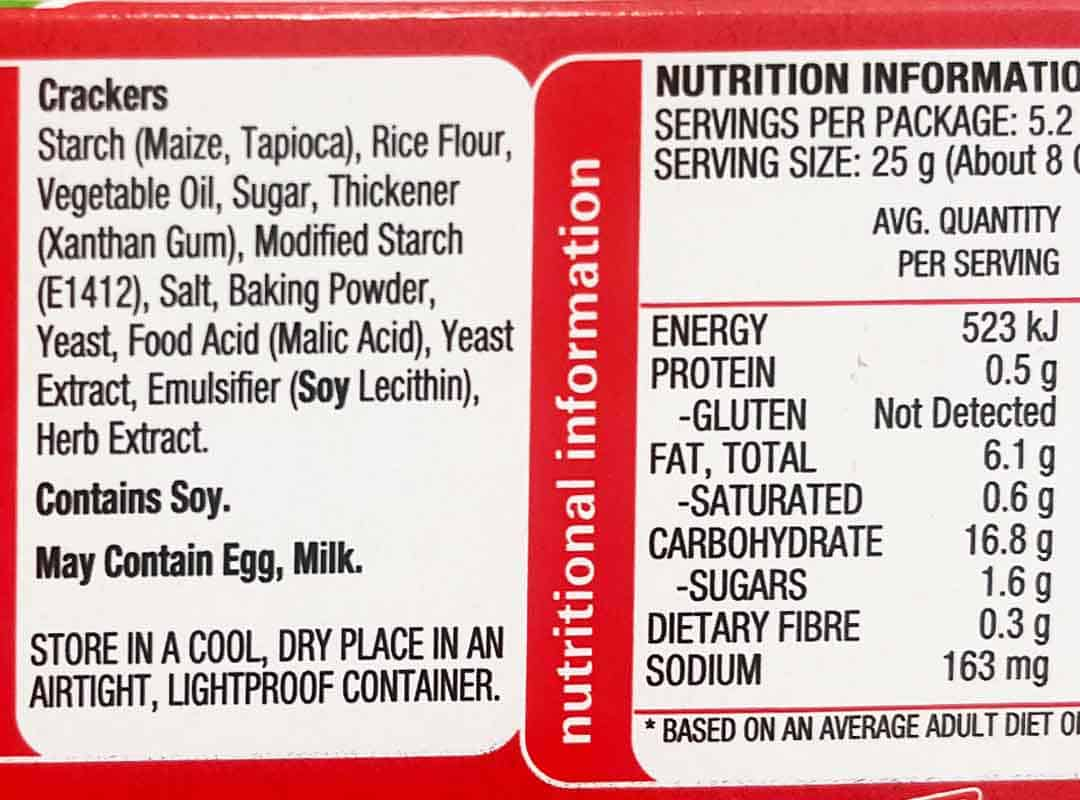


--- Texte OCR extrait (corrigé) ---
LE Lee - = aye ou 7
Crackers NE INFORMA
Starch (Maize, Tapioca), Rice Flour, ERVINGS PER PACKAGE: 5.2
Vegetable Oil, Sugar, Thickener SERVING SIZE: 25 g (About 8 |

    
 
 
  
   
   

(Xanthan Gum), Modified Starch AVG. QUANTITY
(E1412), Salt, Baking Powder, | ___PERSERVING
ENERGY 523 kJ

Yeast, Food Acid (Malic Acid), Yeast
Extract, Emulsifier (Soy Lecithin),
Herb Extract.

PROTEIN + 0.5g
-GLUTEN _ Not Detected
FAT, TOTAL 6.19

Contains Soy. c ANT 0.69

| May Contain E , Milk. BOHYDRATE 16.8 ...

--- Codes E détectés ---
['E1412']

=== Résumé DataFrame ===


image                                          texte_ocr  \
0   1.jpg  INGRÉDIENTS : Sauce : eau, concentré de\ntomat...   
1   2.jpg  légumes 68% [lus de tomotes\ndbase de concentr...   
2  3.jpeg  ingrédients: laitécrémé,\nwast a, DE ne.\nmuis...   
3   4.png  Imprédients : cereans 55.5% l'axe de ble\ncamp...   
4   5.jpg  LE Lee - = aye ou 7\nCrackers NE INFORMA\nStar...   

                                  codesE  
0  [E407A, E450, E452, E250, E316, E621]  
1                                 [E621]  
2                                     []  
3                                 [E307]  
4                                [E1412]

In [9]:
# ========================
# Installation OpenCV si nécessaire
# ========================
import sys, subprocess
try:
    import cv2
except ImportError:
    print("⚠️ OpenCV non trouvé. Installation en cours...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "opencv-python-headless"])
    import cv2

import numpy as np
from PIL import Image
import pytesseract
import re, os, glob, shutil
import pandas as pd
from IPython.display import display

# ✅ Installer Tesseract (binaire Linux) dans le conteneur
!apt-get update -y && apt-get install -y tesseract-ocr tesseract-ocr-fra tesseract-ocr-eng

# ✅ Configurer pytesseract pour utiliser le binaire Linux
tess_path = shutil.which("tesseract")
if not tess_path:
    raise RuntimeError("Tesseract non trouvé. Vérifie l’installation apt-get.")
pytesseract.pytesseract.tesseract_cmd = tess_path

print("Tesseract utilisé :", pytesseract.pytesseract.tesseract_cmd)
print("Version Tesseract :", pytesseract.get_tesseract_version())

# ⛔️ SUPPRIMER toute référence à un .exe Windows
# (ligne supprimée)
# pytesseract.pytesseract.tesseract_cmd = "/workspace/Tesseract/tesseract.exe"

# ========================
# Dossier contenant les images
# ========================
IMAGES_DIR = "/workspace/ImageIA"  # chemin vu depuis le conteneur

# ========================
# Regex et normalisation codes E
# ========================
E_PATTERN = re.compile(r'\bE\s*([0-9OIlSB]{3,4}[A-Z]?)\b', re.IGNORECASE)

def normalize_code(raw: str) -> str:
    if not raw:
        return None
    raw = raw.upper()
    raw = (raw.replace("O", "0").replace("I", "1").replace("L", "1")
               .replace("S", "5").replace("B", "8"))
    if not re.match(r'^[0-9]{3,4}[A-Z]?$', raw):
        return None
    return f"E{raw}"

def extract_e_codes(text: str):
    found_raw = [normalize_code(m.group(1)) for m in E_PATTERN.finditer(text)]
    found = [c for c in found_raw if c]
    seen, ordered = set(), []
    for c in found:
        if c not in seen:
            seen.add(c); ordered.append(c)
    return ordered

def preprocess_image_opencv(img):
    gray = np.array(img.convert("L"))
    blur = cv2.medianBlur(gray, 3)
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 10
    )
    kernel = np.ones((1, 1), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    return Image.fromarray(clean)

# (si tu utilises fix_common_confusions quelque part, assure-toi qu’elle est définie)
def fix_common_confusions(text: str) -> str:
    return text  # placeholder – mets tes corrections si besoin

def process_images_folder(images_dir):
    files = sorted(
        glob.glob(os.path.join(images_dir, "*.jpg")) +
        glob.glob(os.path.join(images_dir, "*.jpeg")) +
        glob.glob(os.path.join(images_dir, "*.png"))
    )
    if not files:
        print(f"Aucune image trouvée dans {images_dir}.")
        return pd.DataFrame()

    rows = []
    for path in files:
        img_name = os.path.basename(path)
        try:
            img = Image.open(path)
            display(img)
        except Exception as e:
            print(f"Impossible d’ouvrir {img_name}: {e}")
            continue

        img_preprocessed = preprocess_image_opencv(img)
        texte_ocr = pytesseract.image_to_string(img_preprocessed, lang="fra+eng").strip()
        texte_ocr = fix_common_confusions(texte_ocr)

        print("\n--- Texte OCR extrait (corrigé) ---")
        print(texte_ocr[:500] + ("..." if len(texte_ocr) > 500 else ""))

        codes = extract_e_codes(texte_ocr)
        print("\n--- Codes E détectés ---")
        print(codes if codes else "Aucun")

        rows.append({"image": img_name, "texte_ocr": texte_ocr, "codesE": codes})

    df = pd.DataFrame(rows)
    print("\n=== Résumé DataFrame ===")
    display(df)
    return df

df_resultats = process_images_folder(IMAGES_DIR)


In [ ]:
import os, requests, sys
print("Python:", sys.executable)
os.environ["OLLAMA_HOST"] = "http://host.docker.internal:11434"
print(requests.get(os.environ["OLLAMA_HOST"] + "/api/tags").json())


In [11]:
# 1) Installer au BON interpréteur (celui du kernel en cours)
import sys, os, json, requests
print("Python utilisé :", sys.executable)

# Installe/maj les libs nécessaires
!{sys.executable} -m pip install -U ollama requests

# 2) Import + config de l’hôte Ollama (Windows)
import ollama
os.environ["OLLAMA_HOST"] = "http://host.docker.internal:11434"

# 3) Test de connexion + client réutilisable
try:
    print("Tags:", requests.get(os.environ["OLLAMA_HOST"] + "/api/tags", timeout=5).json())
    client = ollama.Client(host=os.environ["OLLAMA_HOST"])
    print("✅ Client Ollama prêt.")
except Exception as e:
    raise RuntimeError(f"❌ Ollama injoignable sur {os.environ['OLLAMA_HOST']}. "
                       f"Vérifie qu'il tourne sur Windows (port 11434). Détail: {e}")


Python utilisé : /opt/conda/bin/python3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.0 MB/s  0:00:01 eta 0:00:010m
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [ollama]2m4/6 [pydantic]core]
Tags: {'models': [{'name': 'llama3:latest', 'model': 'llama3:latest', 'modified_at': '2025-09-19T15:09:44.2617253+02:00', 'size': 4661224676, 'digest': '365c0bd3c000a25d28ddbf732fe1c6add414de7275464c4e4d1c3b5fcb5d8ad1', 'details': {'parent_model': '', 'format': 'gguf', 'family': 'llama', 'families': ['llama'], 'parameter_size': '8.0B', 'quantization_level': 'Q4_0'}}]}
✅ Client Ollama prêt.


In [12]:
import json, re, time
from typing import Optional, Dict, Any

# 1) Nettoyage OCR léger
def clean_ocr(text: str) -> str:
    text = re.sub(r"-\s*\n\s*", "", text)  # "anti-\noxydant" -> "antioxydant"
    text = re.sub(r"[ \t]+", " ", text)
    text = re.sub(r"\s*\n\s*", "\n", text)
    return text.strip()

# 2) Pré-prompt
SYSTEM = (
    "Tu es un expert en étiquetage alimentaire. "
    "Tu lis un texte OCR (liste d'ingrédients), corriges les erreurs évidentes, "
    "et extrais les additifs E-xxx avec une explication claire en français. "
    "Réponds en JSON STRICTEMENT VALIDE, sans texte autour."
)

# 3) Prompt utilisateur
def build_user_prompt(ocr_text: str) -> str:
    return f"""
Texte OCR d'ingrédients (à nettoyer puis analyser) :
---
{ocr_text}
---

Tâches :
1) Fournis une version nettoyée et fidèle du texte (champ "cleaned_text").
2) Extrait tous les additifs de type E-xxx (E100..E999 etc.), même si écrit "E 250" ou "E-250".
3) Pour chaque additif, fournis :
   - code (ex: "E250")
   - nom_usuel (ex: "nitrite de sodium") SI connu
   - categorie (ex: "colorant", "conservateur", "antioxydant", "émulsifiant", etc.) SI connu
   - explication (2-3 phrases max, en français, usage + points de vigilance)
   - verdict (parmi: "OK", "À limiter", "Déconseillé") avec justification courte
4) Ajoute un résumé global "summary" (3 puces max).
5) Formate la réponse STRICTEMENT ainsi (JSON valide) :
{{
  "cleaned_text": "...",
  "detected_additives": [
    {{
      "code": "E***",
      "nom_usuel": "...",
      "categorie": "...",
      "explication": "...",
      "verdict": "OK|À limiter|Déconseillé"
    }}
  ],
  "summary": ["...", "...", "..."]
}}

Consignes :
- Réponds UNIQUEMENT par le JSON (pas d'intro, pas de markdown).
- Si aucune mention E-xxx n'est trouvée, renvoie "detected_additives": [] et ajuste le résumé.
"""

# 4) Extracteur JSON robuste (si le modèle ajoute du texte autour)
def _extract_json(s: str) -> Optional[Dict[str, Any]]:
    try:
        return json.loads(s)
    except Exception:
        pass
    a, b = s.find("{"), s.rfind("}")
    if a != -1 and b != -1 and b > a:
        try:
            return json.loads(s[a:b+1])
        except Exception:
            pass
    s2 = re.sub(r"^```(?:json)?|```$", "", s.strip(), flags=re.I|re.M)
    try:
        return json.loads(s2)
    except Exception:
        return None

# 5) Appel modèle (avec retries et sortie au format JSON)
def analyze_ingredients_with_llama(ocr_text: str, model: str = "llama3", max_retries: int = 3) -> Optional[Dict[str, Any]]:
    text = clean_ocr(ocr_text or "")
    last_raw = ""
    for _ in range(max_retries):
        resp = client.chat(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM},
                {"role": "user", "content": build_user_prompt(text)}
            ],
            # 'format': 'json' aide certains modèles à rester en JSON (si supporté par ta version d'Ollama)
            format="json",
            options={
                "temperature": 0.1,
                "top_p": 0.9,
                "num_ctx": 4096,
                "num_predict": 768
            },
            keep_alive="10m",
        )
        last_raw = (resp.message.get("content") or "").strip()
        data = _extract_json(last_raw)
        if data is not None:
            return data
        time.sleep(0.2)
    print("Réponse non-JSON (aperçu):", last_raw[:600], "...\n")
    return None


In [13]:
import time, json, re, pandas as pd

# Colonnes de sortie si absentes
df_resultats = df_resultats.copy()
for col, default in [
    ("ollama_reply_raw", ""),
    ("ollama_json", ""),
    ("additives_count", 0),
    ("summary", "")
]:
    if col not in df_resultats.columns:
        df_resultats[col] = default

for i, row in df_resultats.iterrows():
    ocr_text = row.get("texte_ocr", "")
    img_name = row.get("image", f"image_{i}")
    if not isinstance(ocr_text, str) or not ocr_text.strip():
        continue

    data = analyze_ingredients_with_llama(ocr_text, model="llama3")
    raw  = "" if data is None else json.dumps(data, ensure_ascii=False)
    df_resultats.at[i, "ollama_reply_raw"] = raw

    parsed = data or {}
    df_resultats.at[i, "ollama_json"] = json.dumps(parsed, ensure_ascii=False)

    adds = parsed.get("detected_additives", []) if isinstance(parsed, dict) else []
    df_resultats.at[i, "additives_count"] = len(adds) if isinstance(adds, list) else 0
    df_resultats.at[i, "summary"] = " | ".join(parsed.get("summary", [])) if isinstance(parsed, dict) else ""

    time.sleep(0.15)

print("=== Résultats enrichis ===")
display(df_resultats[["image", "additives_count", "summary"]])


=== Résultats enrichis ===


image  additives_count                                            summary
0   1.jpg                6  La sauce contient des additifs E-xxx pour amél...
1   2.jpg                1  Légumes et ingrédients naturels dominent la co...
2  3.jpeg                2  Laït crémé contenant des antioxydants et des c...
3   4.png                1  Aucun additif suspect | Pas de conservateur | ...
4   5.jpg                1  Le produit contient du soja et peut contenir d...

In [20]:
# cell5: construire le message SYSTEM+USER pour l'application Ollama
#       et le rendre FACILE à coller (clipboard si possible, sinon fichier .txt)

import sys, os, re
from pathlib import Path

# (0) paramètres : choisis la ligne à envoyer
assert "texte_ocr" in df_resultats.columns, "df_resultats doit contenir 'texte_ocr'."
row_index = 0  # <-- change l’index si tu veux une autre image
ocr_text = df_resultats.iloc[row_index]["texte_ocr"]

# (1) helpers
def clean_ocr_for_app(t: str) -> str:
    t = re.sub(r"-\s*\n\s*", "", t)   # anti-\noxydant -> antioxydant
    t = re.sub(r"[ \t]+", " ", t)
    t = re.sub(r"\s*\n\s*", "\n", t)
    return t.strip()

def build_message_for_app(ocr_text: str) -> str:
    # SYSTEM vient de ta cell3 — il doit être déjà défini
    ocr_text = clean_ocr_for_app(ocr_text or "")
    return f"""SYSTEM:
{SYSTEM}

USER:
Texte OCR :
---
{ocr_text}
---

Tâches :
1) "detected_additives": [code, nom_usuel, categorie, explication, verdict(OK|À limiter|Déconseillé)]
2) "summary": 2-3 puces max.
Réponds UNIQUEMENT par ce JSON :
{{
  [
    {{
      "code": "E***",
      "nom_usuel": "...",
      "categorie": "...",
      "explication": "...",
      "verdict": "OK|À limiter|Déconseillé"
    }}
  ],
}}
"""

msg = build_message_for_app(ocr_text)

# (2) on essaie le presse-papiers
copied = False
try:
    import pyperclip
    pyperclip.copy(msg)
    copied = True
    print(f"✅ Message copié dans le presse-papiers pour la ligne {row_index}.")
    print("➡ Ouvre l'application Ollama, clique dans 'Send a message' et fais Ctrl+V, puis Entrée.")
except Exception as e:
    print("ℹ️ Impossible d'utiliser le presse-papiers dans ce conteneur (environnement headless).")
    print("   Je te crée un fichier .txt avec le prompt prêt à coller.")

# (3) si pas de clipboard, écrire un .txt dans /workspace/out_prompts (monté côté Windows)
if not copied:
    out_dir = Path("/workspace/out_prompts")
    out_dir.mkdir(parents=True, exist_ok=True)
    out_path = out_dir / f"prompt_{row_index}.txt"
    out_path.write_text(msg, encoding="utf-8")
    print(f"✅ Prompt écrit dans : {out_path}")
    print("➡ Ouvre le fichier côté Windows ici :")
    print(r"   C:\Users\Admin\Desktop\ml-ocr\out_prompts\prompt_{}.txt".format(row_index))
    print("   Copie tout le contenu et colle-le dans l'application Ollama (Send a message).")

# (4) aperçu dans le notebook (pour copier à la main si tu veux)
print("\n--- Aperçu (début) ---\n")
print(msg[:1000] + ("..." if len(msg) > 1000 else ""))


ℹ️ Impossible d'utiliser le presse-papiers dans ce conteneur (environnement headless).
   Je te crée un fichier .txt avec le prompt prêt à coller.
✅ Prompt écrit dans : /workspace/out_prompts/prompt_0.txt
➡ Ouvre le fichier côté Windows ici :
   C:\Users\Admin\Desktop\ml-ocr\out_prompts\prompt_0.txt
   Copie tout le contenu et colle-le dans l'application Ollama (Send a message).

--- Aperçu (début) ---

SYSTEM:
Tu es un expert en étiquetage alimentaire. Tu lis un texte OCR (liste d'ingrédients), corriges les erreurs évidentes, et extrais les additifs E-xxx avec une explication claire en français. Réponds en JSON STRICTEMENT VALIDE, sans texte autour.

USER:
Texte OCR :
---
INGRÉDIENTS : Sauce : eau, concentré de
tomate, farine de blé, saindoux, sel, arôme,
gélifiants : farine de graines de caroube et
gone guar . Harlcots blancs précuits wn.
aucisses fumées (18%) : viande de dinde,
gras de porc, malgre de tête de porc, viande
eporc, eau, farine de blé, protéines de
soja, couenne de porc